# Making well-labelled and enjoyable histograms with Python Pandas - Part I

The first step in the quantitative description of a collection of data consists in the set of all measures that can be performed analysing a single variable of interest. This is the domain of **univariate statistical analysis**. 

In this framework, the most common measures refer to the **central tendency** (mean, median, mode) and to the **dispersion** (range, variance, standard deviation, etc.). However,  these measures cannot be sufficient for a complete characterisation of a dataset. 

For instance, let us suppose that we draw a sample of _N_ customers and we would like to report some "key" features of related portfolios. After assessing the average and the median portfolio value for each customer or the range of ages of the sample, it could be interesting to see how many clients are distributed over the age, and how the amounts are distributed over geographic areas, professions, etc. 

_In other words, groupby have to be done and histograms have to be produced_. 

**And the clearer they are the more informational the report will be**.

In this brief tutorial, I will show some Python tools and tricks to produce enjoyable histograms (and consequently, plots) to show in reports and articles.

## Build a Pandas Dataframe example and make first simple histograms

In this section, we will build a simple dataset of typical customer information and we will produce some histograms without any customization.

Let us start, importing the necessary modules for this task.

In [89]:
%matplotlib notebook
# to get inline plots in the present notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let _N_ be the number of customers:

In [90]:
N = 1000

Create a list of ID numbers, called `idcli`, concatenating element-wise an array of strings 'ID' with an array of numbers from 0 to N-1:

In [91]:
idstr = ['ID']*N    # idstr = ['ID', 'ID', 'ID', 'ID', 'ID', ...] N-times
nstrarray = np.array(range(N), str)     # nstrarray = ['0', '1', '2', ..., 'N-1']
idcli = map(str.__add__, idstr, nstrarray)    # idcli = ['ID0', 'ID1', 'ID2', 'ID3', ...,]

The list of customer ages is a vector of integers extracted randomly from a uniform distribution:

In [92]:
age = np.random.randint(20,80,N)

The geographical areas are chosen to be numbered from 1 to 8, so that each number is replaced by a direction as shown below:

In [93]:
geo = np.array(np.random.randint(1,9,N), str)

geo_value = ['1', '2', '3', '4', '5', '6', '7', '8']
geo_area = ['N', 'E', 'S', 'W', 'NE', 'SE', 'SW', 'NW']

for j in range(len(geo_value)): #replace each number with a direction
    geo[geo == geo_value[j]] = geo_area[j]

The amount owned by each customer is a vector of _N_ integers drawn from a normal distribution with given mean and sigma:

In [94]:
mean = 10**5
sigma = 3*10**4
amo = np.array(np.random.normal(mean,sigma,N), int)

In order to be sure that all the amounts are positive, we replace all non-positive numbers with random numbers extracted from a uniform distribution in the range [1,mean]:

In [95]:
amo[amo <= 0] = np.random.randint(1,mean,1)

Finally, let us build the vector representing the number of financial instruments owned by each customer (using a normal distribution with given mean and sigma and replace any non-positive number with a random number in the range [1, mean]):

In [96]:
mean_i = 20
sigma_i = 8
ninstr = np.array(np.random.normal(20,8,N), int)
ninstr[ninstr <= 0] = np.random.randint(1,mean_i,1)

The DataFrame is built with the above variables:

In [97]:
df = pd.DataFrame({'ID': idcli, 'AGE': age, 'GEO': geo, 'N_INSTR': ninstr, 'AMOUNT': ctv})

Let us order the columns in the following way and see the first 5 entries of the dataframe:

In [98]:
db = df[['ID', 'AGE', 'GEO', 'N_INSTR', 'AMOUNT']]
db[0:5]

,ID,AGE,GEO,N_INSTR,AMOUNT
0,ID0,78,SE,10,44614
1,ID1,56,W,10,66586
2,ID2,48,SW,25,59949
3,ID3,46,NW,26,86433
4,ID4,42,S,15,88994


We are able to make the firs simple histograms with the attribute `hist`:

<IPython.core.display.Javascript object>


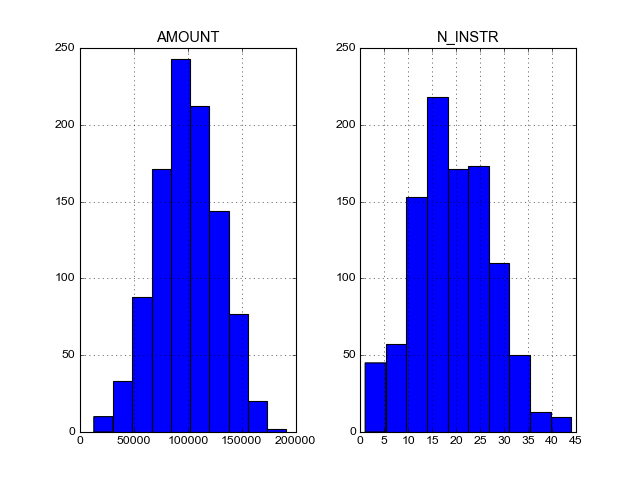

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13076c510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130900e10>]], dtype=object)

In [99]:
db[['AMOUNT', 'N_INSTR']].hist()

## Well-labelled and enjoyable histograms 

Naturally, the above histograms can be better. In Python, there are a lot of ways to customize and improve the appearance of the plot. However, if you would like to have the complete control over the frequency distributions, instead of using the `hist` attribute of dataframe, I would suggest a simple procedure to:

* set the bin edges
* evaluate the frequency over the bin edges with a `groupby` and `pd.cut`
* use attribute `plot` with `kind=bar`
* add any other customization to improve the aspect of the plot.

Let us see an example, reproducing the histrogram of the frequency distribution of the amounts.

First, one should set the number of bins. One choice can be with `numpy.linspace(min, max, num)` in order to give evenly spaced numbers over the specified interval [min, max]:

In [100]:
minamo = min(amo)
maxamo = max(amo)
number_of_edges = 5
bin_x = np.linspace(minamo, maxamo, number_of_edges)
print bin_x

[   7946.     55838.25  103730.5   151622.75  199515.  ]


Or set arbitrarily the value of bin edges. For example

In [101]:
bin_x = [0, 10000, 50000, 100000, 150000 , max(ctv)]

The counting of customers in a given range of amount can be performed by using a `groupby` and the function `cut` within the custom bin edges:

In [102]:
db_amount = db.groupby(pd.cut(db['AMOUNT'], bin_x))['ID'].count()
db_amount

AMOUNT
(0, 10000]            0
(10000, 50000]       45
(50000, 100000]     471
(100000, 150000]    442
(150000, 191325]     42
Name: ID, dtype: int64

In [103]:
freq_amount = 100.0*db_amount/sum(db_amount)
freq_amount

AMOUNT
(0, 10000]           0.0
(10000, 50000]       4.5
(50000, 100000]     47.1
(100000, 150000]    44.2
(150000, 191325]     4.2
Name: ID, dtype: float64

Now, we can draw our histograms.

First, set position of ticks and related labels.

In [104]:
ticks_position = range(len(db_amount))
xticks_labels = ['0-10K', '10K-50K', '50K-100K', '100K-150K', '150K-200K']

Change the font family and the font size of the plot

In [105]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 11

Now, we can draw the histogram. In the following, comments explain each step and two subplots with some different options are given.

<IPython.core.display.Javascript object>


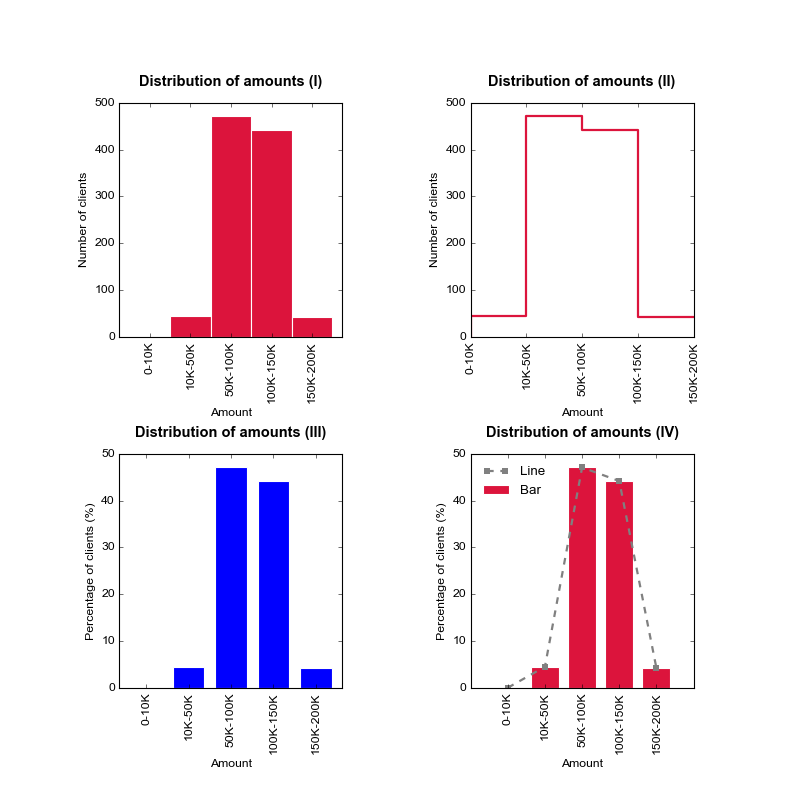

In [109]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
fig.tight_layout(pad = 8) # help the subplot to fit the figure area
# first sublot ####################################################
plot_title = 'Distribution of amounts (I)'
x_axis_label = 'Amount'
y_axis_label = 'Number of clients'
AX0 = axes[0,0]

# see DataFrame.plot for all options
db_amount.plot(ax = AX0,   kind = 'bar',  color='crimson', width = 1, label='CNT', edgecolor = "white")
# put legend in the upper right corner, with no frame and fontsize = 12
#AX0.legend(loc = 0, frameon = False, fontsize = 12)

# set x ticks in the positions given by `ticks_position`
AX0.set_xticks(ticks_position)
# set the labels of x ticks as given by the array `xticks_labels`, with rotation of 90 degrees
AX0.set_xticklabels(xticks_labels, rotation = 90)

AX0.set_xlabel(x_axis_label)
AX0.set_ylabel(y_axis_label)
AX0.set_title(plot_title, fontweight='bold', y = 1.05)

# second sublot ###################################################
plot_title = 'Distribution of amounts (II)'
x_axis_label = 'Amount'
y_axis_label = 'Number of clients'
AX1 = axes[0,1]
# see DataFrame.plot for all options
db_amount.plot(ax = AX1,   kind = 'line',  color='crimson', label='CNT', linestyle = 'steps', linewidth = 2)
# put legend in the upper right corner, no frame and fontsize = 12
#AX1.legend(loc = 0, frameon = False, fontsize = 12)

# set x ticks in the positions given by `ticks_position`
AX1.set_xticks(ticks_position)
# set the labels of x ticks as given by the array `xticks_labels`, with rotation of 90 degrees
AX1.set_xticklabels(xticks_labels, rotation = 90)

AX1.set_xlabel(x_axis_label)
AX1.set_ylabel(y_axis_label)
AX1.set_title(plot_title, fontweight='bold', y = 1.05)

# third sublot ####################################################
plot_title = 'Distribution of amounts (III)'
x_axis_label = 'Amount'
y_axis_label = 'Percentage of clients (%)'
AX2 = axes[1,0]

# see DataFrame.plot for all options
freq_amount.plot(ax = AX2,   kind = 'bar',  color='blue', width = 0.75, label='CNT', edgecolor = "white")
# put legend in the upper left corner, with no frame and fontsize = 12
#AX2.legend(loc = 0, frameon = False, fontsize = 12)

# set x ticks in the positions given by `ticks_position`
AX2.set_xticks(ticks_position)
# set the labels of x ticks as given by the array `xticks_labels`, with rotation of 90 degrees
AX2.set_xticklabels(xticks_labels, rotation = 90)

AX2.set_xlabel(x_axis_label)
AX2.set_ylabel(y_axis_label)
AX2.set_title(plot_title, fontweight='bold', y = 1.05)

# third sublot ####################################################
plot_title = 'Distribution of amounts (IV)'
x_axis_label = 'Amount'
y_axis_label = 'Percentage of clients (%)'
AX3 = axes[1,1]

# see DataFrame.plot for all options (`width` refer to the bar width)
freq_amount.plot(ax = AX3,  kind = 'bar',  color='crimson', width = 0.75, label='Bar', edgecolor = "white")
freq_amount.plot(ax = AX3,  kind = 'line', color='gray', label='Line', linestyle = '--', marker = 's', 
                 linewidth = 2, markeredgecolor = 'none')

# put legend in the upper left corner, with no frame and fontsize = 12
AX3.legend(loc = 0, frameon = False, fontsize = 12)

# set x ticks in the positions given by `ticks_position`
AX3.set_xticks(ticks_position)
# set the labels of x ticks as given by the array `xticks_labels`, with rotation of 90 degrees
AX3.set_xticklabels(xticks_labels, rotation = 90)

AX3.set_xlim([-1, max(ticks_position)+1]) # necessary when two different kinds of plot are drawn

AX3.set_xlabel(x_axis_label)
AX3.set_ylabel(y_axis_label)
AX3.set_title(plot_title, fontweight='bold', y = 1.05)


####################################################################
plt.show()